# Visualization of margins

as discussed in Bartlett's [paper](https://arxiv.org/pdf/1706.08498.pdf) (see Figure 2)

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
%load_ext autoreload
%autoreload 2

import time
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from spectral_adversarial_regularization import dl_utils
from spectral_adversarial_regularization import adversarial as ad
from spectral_adversarial_regularization.models import *

%matplotlib inline

In [4]:
from get_cifar10 import get_cifar10_dataset

# Load dataset
n_samps = 50000
num_classes = 10

# each value: Xtr, Ytr, Xtt, Ytt
data = {
    'true': get_cifar10_dataset(0, n_samps=n_samps),
    'rand': get_cifar10_dataset(100, n_samps=n_samps)
}

data = {
    'true': (data['true'][0], data['true'][1], data['true'][2][500:], data['true'][3][500:]),
    'rand': (data['rand'][0], data['rand'][1], data['rand'][2][500:], data['rand'][3][500:])
}


data_small = {
    'true': (data['true'][0][:1000], data['true'][1][:1000], data['true'][2][:1000], data['true'][3][:1000]),
    'rand': (data['rand'][0][:1000], data['rand'][1][:1000], data['rand'][2][:1000], data['rand'][3][:1000])
}

In [5]:
def sort_func(fname):
    if 'wd' not in fname:
        return (-1, fname)
    return (float(fname.split('wd')[1]), fname)

def get_all_margins(data, arch_name, models, dataset):
    assert dataset == 'train' or dataset == 'test'
    
    results = {'true':{}, 'rand':{}}
    main_dir = 'save_weights_n50000_%s_tightsn'%(arch_name)
    for i in results.keys():
            
        if dataset == 'train':
            X, Y = data[i][0], data[i][1]
        else:
            X, Y = data[i][2], data[i][3]
  
        # Maybe ignore default model since it's not sn'd (we only sn last layer)
#         save_dir = 'save_weights_n50000_%s/%s_%s/'%(arch_name, arch_name, i)
#         results[i][arch_name] = dl_utils.get_margins(X, Y, save_dir, arch=models['default'])
        
        for f in os.listdir(main_dir):
            if i in f:
                name = f.replace('_rand', '').replace('_true', '')
                save_dir = os.path.join(main_dir, f)
                results[i][name] = dl_utils.get_margins(X, Y, save_dir, models[f.split('_')[2]])
            
    return results

def plot_margins(results, plots_per_row=4):
    
    for i, label in enumerate(sorted(results['true'], key=sort_func)): 
        if i%plots_per_row == 0:
            plt.figure(figsize=(16, 4))

        plt.subplot(1, plots_per_row, i%plots_per_row+1)
        dl_utils.plot_stacked_hist(results['rand'][label], results['true'][label], ['rand', 'true'])
        plt.title(label)
        plt.xlabel('margin')
        plt.grid()

In [5]:
arch_name = 'alexnet'

models = {
    'default': alexnet.alexnet,
    'sn': alexnet_tightsn.alexnet_sn,
    'sar': alexnet_tightsn.alexnet_sar
}

results = get_all_margins(data_small, arch_name, models, 'test')

INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet/alexnet_rand/checkpoints/epoch80
Sanity check: accuracy is 0.12200.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/alexnet_rand_sn/checkpoints/epoch499
Sanity check: accuracy is 0.09400.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/alexnet_rand_sar_wd0/checkpoints/epoch234
Sanity check: accuracy is 0.10300.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/alexnet_rand_sar_wd0.04/checkpoints/epoch499
Sanity check: accuracy is 0.11100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/alexnet_rand_sar_wd4e-05/checkpoints/epoch249
Sanity check: accuracy is 0.08800.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/alexnet_rand_sar_wd0.0004/checkpoints/epoch499
Sanity check: accuracy is 0.09900.
INFO:tensorflow:Restoring parameters from save_weights_n50000_alexnet_tightsn/al

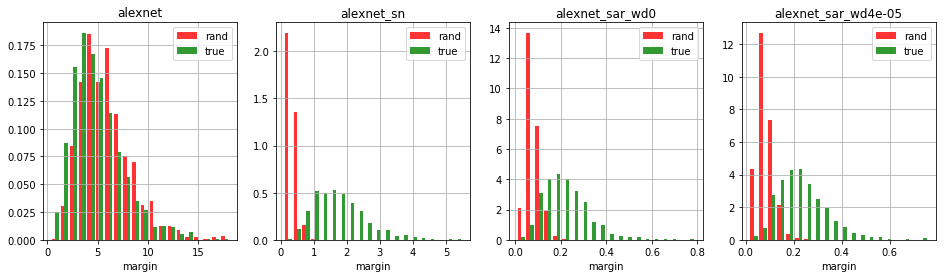

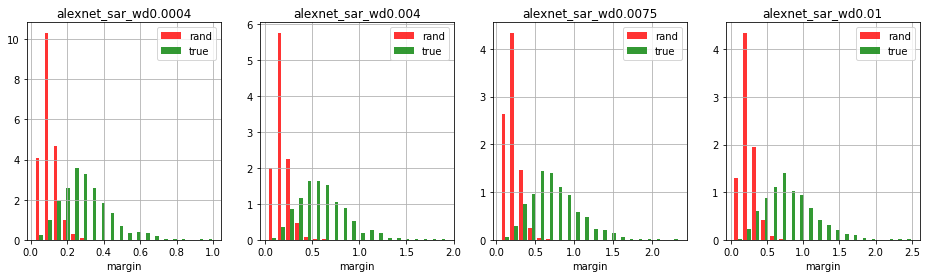

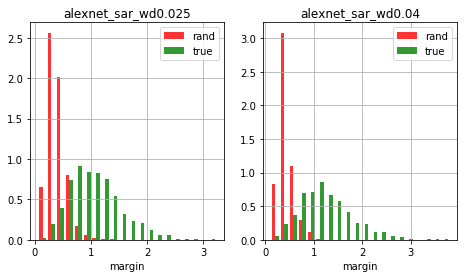

In [8]:
plot_margins(results)

In [7]:
arch_name = 'inception'

models = {
    'default': inception.inception,
    'sn': inception_tightsn.inception_sn,
    'sar': inception_tightsn.inception_sar
}

results = get_all_margins(data_small, arch_name, models, 'test')

INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sn/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sar_wd0/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sar_wd4e-05/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sar_wd0.0004/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sar_wd0.004/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameters from save_weights_n50000_inception_tightsn/inception_rand_sar_wd0.04/checkpoints/epoch499
Sanity check: accuracy is 0.09100.
INFO:tensorflow:Restoring parameter

In [ ]:
arch_name = 'vgg'

models = {
    'default': vgg.vgg,
    'sn': vgg_tightsn.vgg_sn,
    'sar': vgg_tightsn.vgg_sar
}

results = get_all_margins(data_small, arch_name, models, 'test')

In [ ]:
plot_margins(results)